In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from scipy.cluster.hierarchy import linkage, dendrogram

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Normalize the dataset so that each dimension lies between 0 and 1, so they have equal weight in the clustering process.

In [4]:
X = preprocessing.normalize(iris.data)
X[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

```iris.target``` contains the labels that indicate which type of Iris flower each sample is

In [5]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Hierarchical clustering

In [6]:
# Ward linkage 
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)
ward_ar_score = adjusted_rand_score(y, ward_pred) # Calculate the adjusted Rand score

In [7]:
# Complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_pred = complete.fit_predict(X)
complete_ar_score = adjusted_rand_score(y, complete_pred)

In [8]:
# Average linkage
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred = avg.fit_predict(X)
avg_ar_score = adjusted_rand_score(y, avg_pred)

In [9]:
print( "Scores: \nWard:", ward_ar_score,
      "\nComplete: ", complete_ar_score, 
      "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352


### Dendrogram visualization with scipy

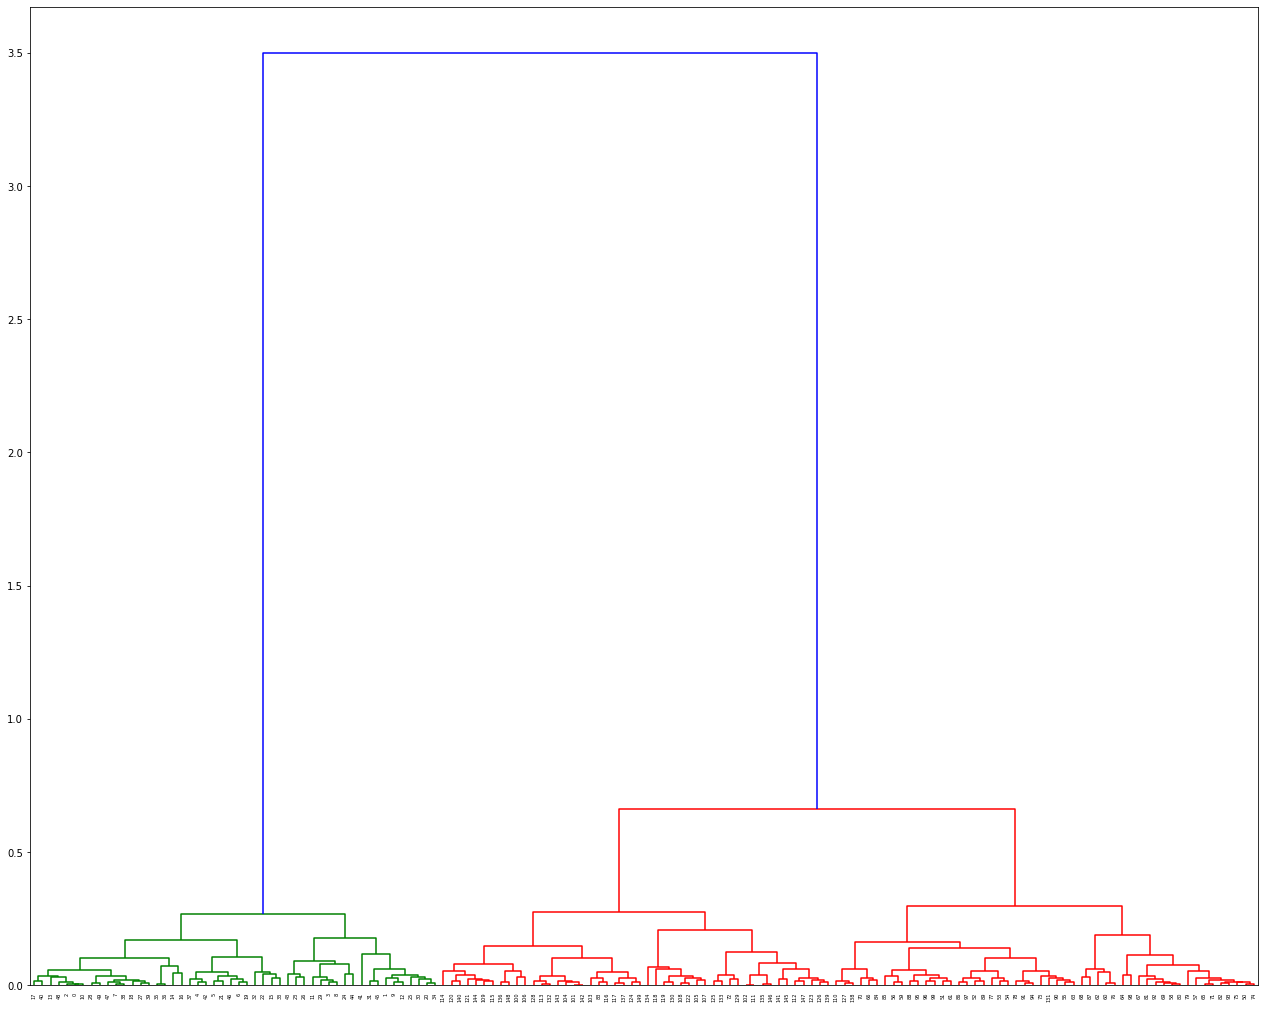

In [10]:
linkage_type = 'ward'
linkage_matrix = linkage(X, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix)
plt.show()

### Visualization with Seaborn's clustermap

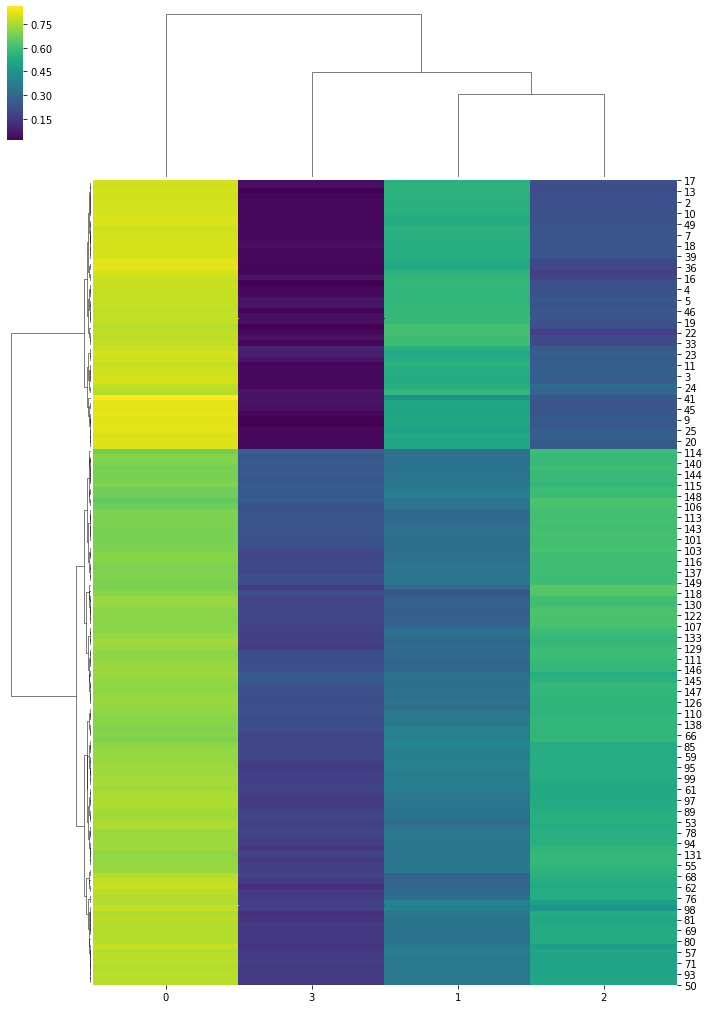

In [11]:
sns.clustermap(X, figsize=(12,18), method=linkage_type, cmap='viridis')

plt.show()